In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read, Stream
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from matplotlib import cm
from scipy import signal
import shutil

In [39]:
 from scipy.ndimage import gaussian_filter1d

What else to do?

Maybe try some alternatives from GPT If so, which of them?

Lets try smoothing the data

In [7]:
earthCatalog = 'C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthDataShifted\\catalogs\\'
catalogFiles = os.listdir(earthCatalog)
trainCatalogFile = f'{earthCatalog}{catalogFiles[2]}'
catalog = pd.read_csv(trainCatalogFile, index_col=0)
catalog

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2010-10-13T12_01_07_shifted.mseed,18.60
1,AZ.PFO..HHZ_2013-10-14T12_31_52_shifted.mseed,282.21
2,AZ.PFO..HHZ_2018-09-08T05_33_12_shifted.mseed,224.54
3,AZ.PFO..HHZ_2018-03-16T04_01_28_shifted.mseed,396.66
4,AZ.PFO..HHZ_2010-02-20T04_02_20_shifted.mseed,294.49
...,...,...
85,AZ.PFO..HHZ_2018-02-11T08_56_04_shifted.mseed,166.12
86,AZ.PFO..HHZ_2008-09-03T17_57_38_shifted.mseed,26.75
87,AZ.PFO..HHZ_2016-10-31T10_34_44_shifted.mseed,316.72
88,AZ.PFO..HHZ_2012-08-26T20_51_36_shifted.mseed,163.60


In [29]:
register = catalog.iloc[45]
register

filename         AZ.PFO..HHZ_2006-11-29T21_19_54_shifted.mseed
time_rel(sec)                                           215.08
Name: 45, dtype: object

In [30]:
registerRecord = read(f'C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthDataShifted\\training\\{register.filename}')
registerRecord

1 Trace(s) in Stream:
AZ.PFO..HHZ | 2006-11-29T21:22:59.530000Z - 2006-11-29T21:29:39.530000Z | 100.0 Hz, 40001 samples

In [31]:
registerRecord.traces[0].stats

         network: AZ
         station: PFO
        location: 
         channel: HHZ
       starttime: 2006-11-29T21:22:59.530000Z
         endtime: 2006-11-29T21:29:39.530000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 40001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 11, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 45056})

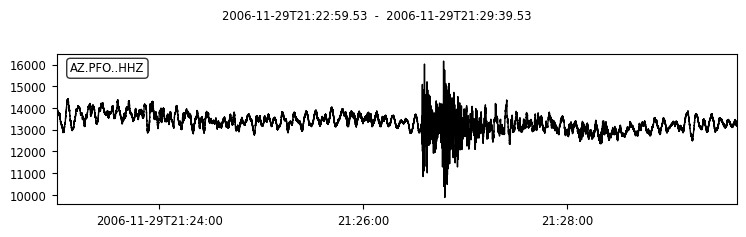

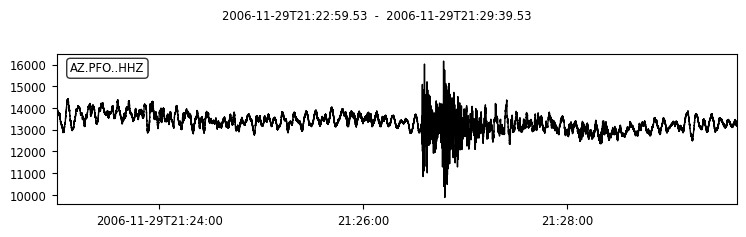

In [32]:
registerRecord.plot()

Now let's appy some algorithm :,v

In [33]:
def normalizeData(traces):
    data = traces.data
    minVal, maxVal = np.min(data), np.max(data)
    normData = 2 * (data - minVal) / (maxVal - minVal) - 1
    return normData

In [34]:
normData = normalizeData(registerRecord.traces[0])

[]

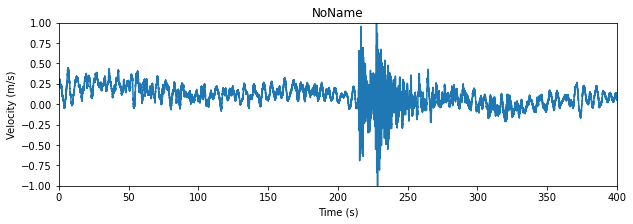

In [74]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times(), normData)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

[]

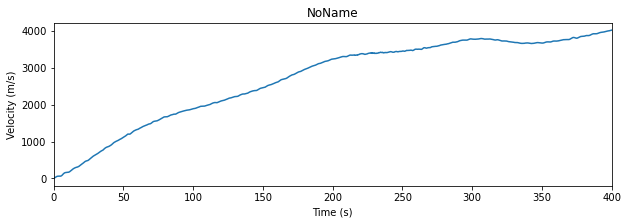

In [36]:
cumsum = np.cumsum(normData)
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times(), cumsum)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

[]

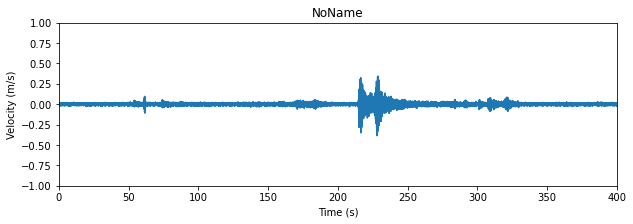

In [73]:
diff = np.diff(normData)
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times()[:-1], diff)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

In [49]:
from scipy.signal import savgol_filter

[]

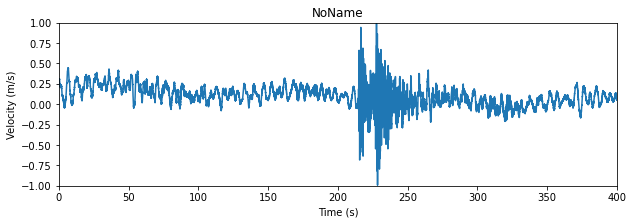

In [71]:
window_length = 9
poly_order = 5
smoothedData = savgol_filter(normData, window_length, poly_order)

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times(), smoothedData)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

[]

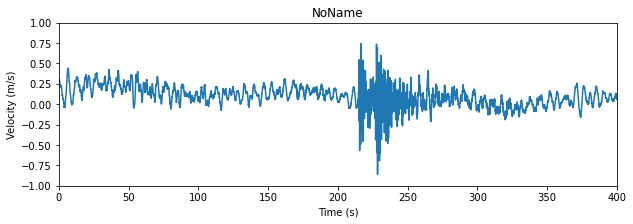

In [70]:
windowSize = 7
smoothedData = np.convolve(normData, np.ones(windowSize) / windowSize, mode='valid')

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times()[3:-3], smoothedData)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

[]

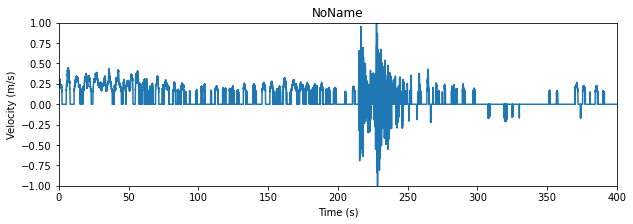

In [72]:
upbound, lowbound = 0.15, -0.15
smoothedData= normData.copy()
smoothedData[(normData >= lowbound) & (normData <= upbound)] = 0

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times(), smoothedData)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

In [68]:
smoothedData

0

[]

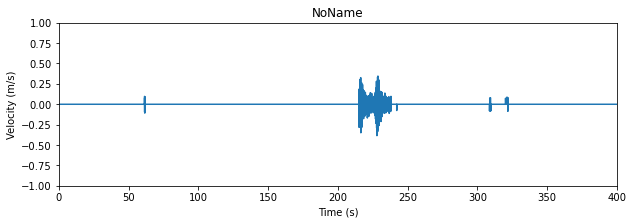

In [79]:
upbound, lowbound = 0.07, -0.07
smoothedData= diff.copy()
smoothedData[(diff >= lowbound) & (diff <= upbound)] = 0

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(registerRecord.traces[0].times()[0:-1], smoothedData)
ax.set_xlim([min(registerRecord.traces[0].times()),max(registerRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

New Register record to check if works with other signals

special cases:

* 15

In [148]:
newRegister=catalog.iloc[74]
newRegisterRecord=read(f'C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthDataShifted\\training\\{newRegister.filename}')
newRegisterRecord

1 Trace(s) in Stream:
AZ.PFO..HHZ | 2005-08-31T16:12:45.840000Z - 2005-08-31T16:19:25.840000Z | 100.0 Hz, 40001 samples

In [149]:
newRegister

filename         AZ.PFO..HHZ_2005-08-31T16_12_24_shifted.mseed
time_rel(sec)                                           378.31
Name: 74, dtype: object

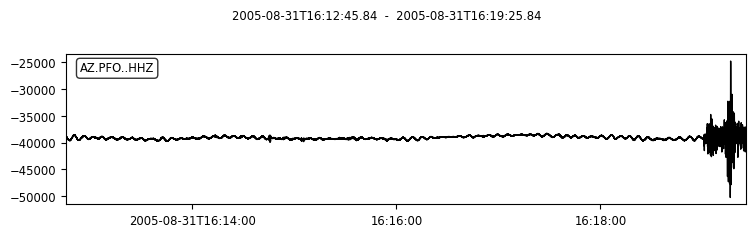

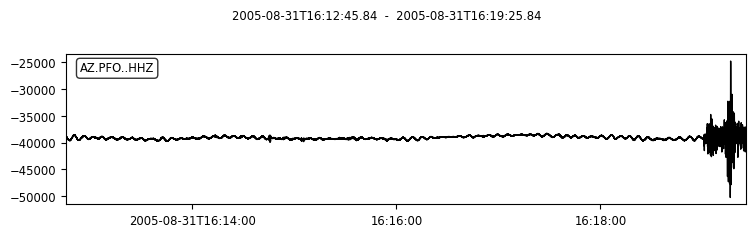

In [150]:
newRegisterRecord.plot()

[]

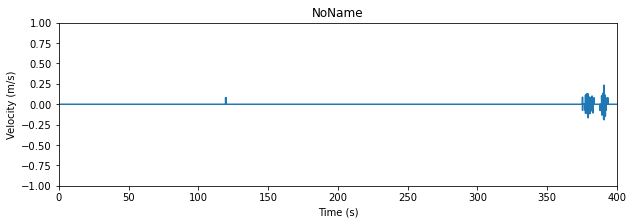

In [151]:
upbound, lowbound = 0.07, -0.07

newNormData = normalizeData(newRegisterRecord.traces[0])
newDiff = np.diff(newNormData)

newSmoothedData= newDiff.copy()
newSmoothedData[(newDiff >= lowbound) & (newDiff <= upbound)] = 0

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(newRegisterRecord.traces[0].times()[:-1], newSmoothedData)
ax.set_xlim([min(newRegisterRecord.traces[0].times()),max(newRegisterRecord.traces[0].times())])
ax.set_ylim([-1,1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

Function to smooth a trace

In [238]:
def smoothTrace(trace, lowBound, upBound):
    newTrace = trace.copy()
    
    newTrace.data = normalizeData(newTrace.data)
    newTrace.data = np.diff(newTrace.data)
    newTrace.data[(newTrace.data >= lowbound) & (newTrace.data <= upbound)] = 0
    return newTrace
    

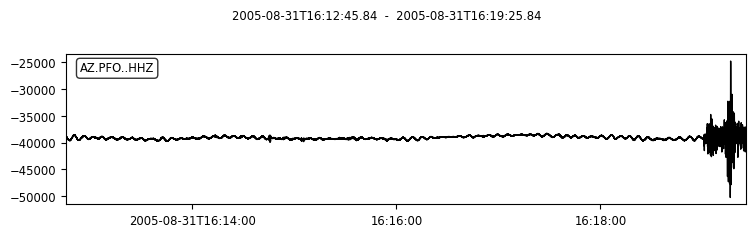

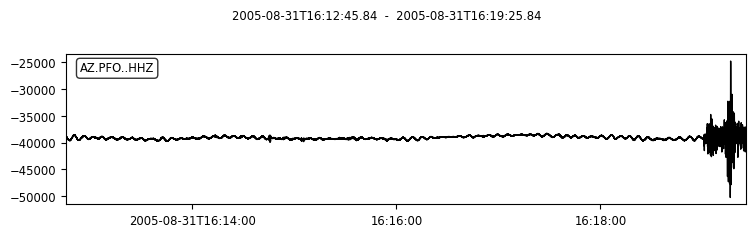

In [239]:
newRegisterRecord.traces[0].plot()

In [240]:
smoothNewRegisterRecord =smoothTrace(newRegisterRecord.traces[0],-0.07,0.07)

In [241]:
smoothNewRegisterRecord.data

array([0., 0., 0., ..., 0., 0., 0.])

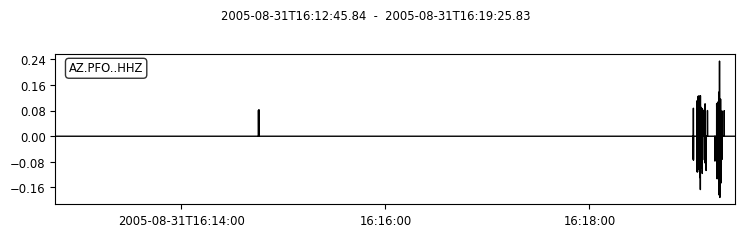

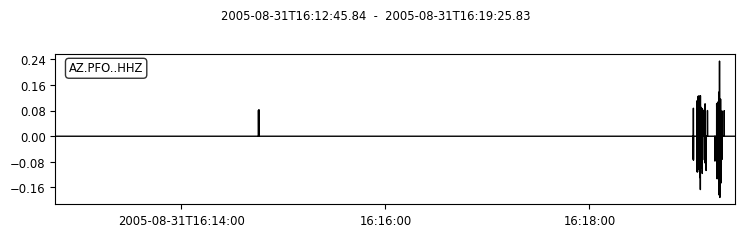

In [242]:
smoothNewRegisterRecord.plot()